# OpenCV load image (cv2.imread)

In [ ]:
import os
import sys
os.chdir('/work')
!pwd
ROOT_DIR = os.path.abspath("")
print (ROOT_DIR)
sys.path.append(ROOT_DIR)

/work
/work


### Import Packages

In [ ]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import cv2

In [ ]:
import numpy as np

### Function to display images in Jupyter Notebooks and Google Colab

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.axis(False)
	plt.imshow(image)
	plt.title(title)
	plt.grid(True)
	plt.axis('on')
	plt.show()

### Implementing our OpenCV image loading script

In [ ]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#    help="path to input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "cat2.jpg",
}

In [ ]:
# load the image from disk via "cv2.imread" and then grab the spatial
# dimensions, including width, height, and number of channels
image = cv2.imread(args["image"])
(h, w, c) = image.shape[:3]

# display the image width, height, and number of channels to our
# terminal
print("width: {} pixels".format(image.shape[1]))
print("height: {}  pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 800 pixels
height: 500  pixels
channels: 3


In [ ]:
mid_row = image.shape[0]//2
mid_height = image.shape[1]//2

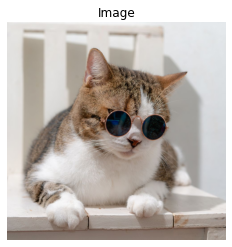

True

In [ ]:
# show the image and wait for a keypress
plt_imshow("Image", image)

# save the image back to disk (OpenCV handles converting image
# filetypes automatically)
cv2.imwrite("newheist.png", image)

In [ ]:
from google.colab.patches import cv2_imshow

ModuleNotFoundError: No module named 'google.colab'

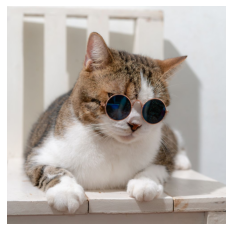

In [ ]:
plt_imshow('',image)

# Getting the Setting

In [ ]:
image[500].shape

(980, 3)

In [ ]:
(b, g, r) = image[0, 0]

In [ ]:
b, g, r

(232, 234, 235)

In [ ]:
(b, g, r) = image[500, 750]

In [ ]:
b,g,r

(155, 158, 162)

In [ ]:
for i in range(500,600):
  for j in range(750,850):
    image[j][i] = np.array([255,255,255])

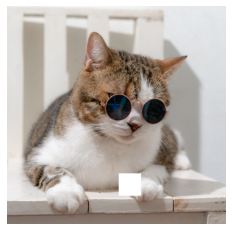

In [ ]:
plt_imshow('', image)

## row first and then column

In [ ]:
image[500:600, 750:850] = [255,255,255]

# Try OpenCV

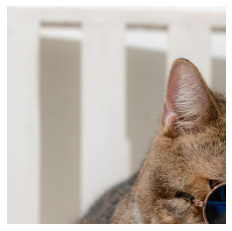

In [ ]:
tl = image[0:mid_row, 0:mid_height]
plt_imshow('', tl)

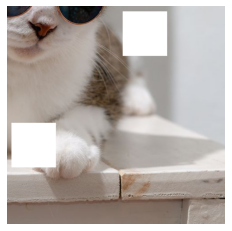

In [ ]:
br = image[mid_row:, mid_height:]
plt_imshow('', br)

In [ ]:
for i in range(image.shape[1]):
  for j in range(image.shape[0]):
    b, g, r = image[j][i]
    def func(x):
      return 255-x
    image[j][i] = (func(b), func(g), func(r))

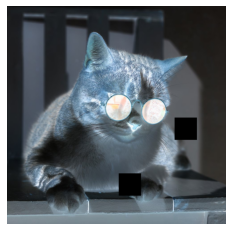

In [ ]:
plt_imshow('', image)

In [ ]:
canvas = np.zeros((300,300,3), dtype="uint8")

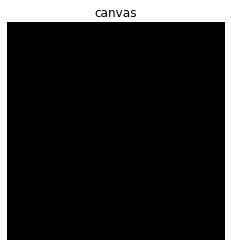

In [ ]:
plt_imshow('canvas', canvas)

In [ ]:
canvas[:,:] = (255,255,255)

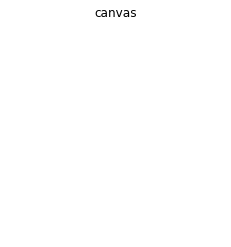

In [ ]:
plt_imshow('canvas', canvas)

In [ ]:
cv2.__version__

'4.5.3'

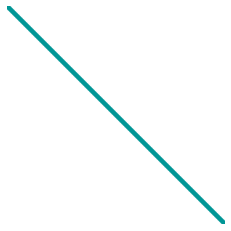

In [ ]:
cv2.line(canvas, (0,0), (canvas.shape[0], canvas.shape[1]), (150,150,0), 5)
plt_imshow('', canvas)

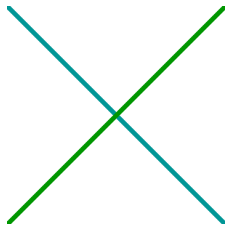

In [ ]:
cv2.line(canvas, (canvas.shape[0], 0), (0,canvas.shape[1]), (0,150,0), 5)
plt_imshow('', canvas)

In [ ]:
def polar_coordinate_point(r, theta):
  import math
  y = int(math.sin(theta)*r)
  x = int(math.cos(theta)*r)
  return x,y

In [ ]:
import math
print(polar_coordinate_point(12, (math.pi/180*195)))

(-11, -3)


In [ ]:
def to_radian(x):
  import math
  return math.pi*x/180

In [ ]:
deg = 0
for i in np.arange(0, 300, 1):
  x,y = polar_coordinate_point(i, to_radian(deg))
  x-=2
  y-=1
  canvas[y,x] = [0,0,0]
  deg+=1

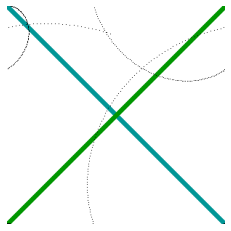

In [ ]:
plt_imshow('', canvas)

# Lab 2

In [ ]:
image = cv2.imread(args["image"])

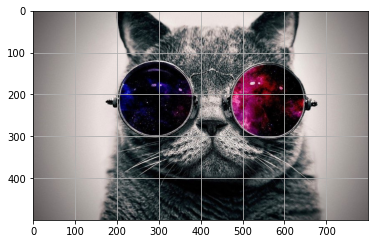

In [ ]:
plt_imshow('', image)

In [ ]:
image.shape

(500, 800, 3)

In [ ]:
M = np.array([[1,0,10], [0,1,50]], dtype=np.float32)
temp = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

In [ ]:
M

array([[ 1.,  0., 10.],
       [ 0.,  1., 50.]], dtype=float32)

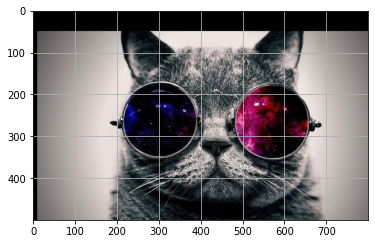

In [ ]:
plt_imshow('', temp)

In [ ]:
h = image.shape[0]
w = image.shape[1]

In [ ]:
M = cv2.getRotationMatrix2D((h//2, w//2), 45, 1)

In [ ]:
image.shape

(500, 800, 3)

In [ ]:
temp = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

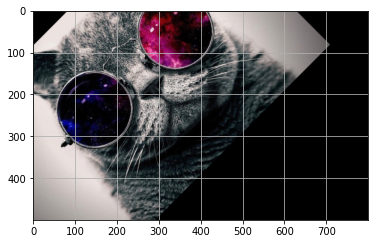

In [ ]:
plt_imshow('',temp)

In [ ]:
import imutils

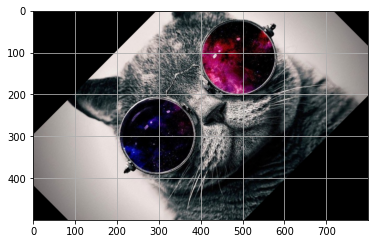

In [ ]:
plt_imshow('', imutils.rotate(image, 45))

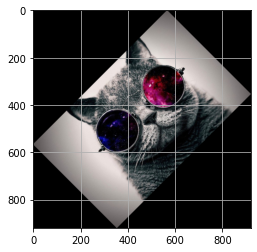

In [ ]:
plt_imshow('',imutils.rotate_bound(image, -45))

# Cropping image

In [ ]:
plt_imshow('', image)

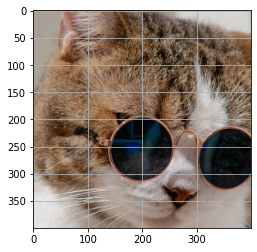

In [ ]:
plt_imshow('', image[200:600, 300:700])

# Flipping Image

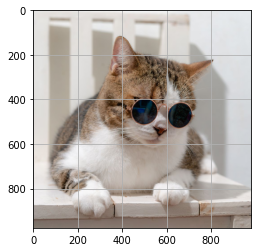

In [ ]:
plt_imshow('', image)

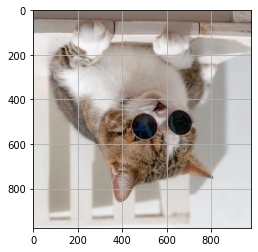

In [ ]:
temp = cv2.flip(image, 0)
plt_imshow('',temp)

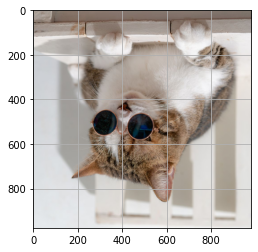

In [ ]:
plt_imshow('', cv2.flip(image, -4))

In [ ]:
def getRotationMatrix(angle, Tx, Ty):
    import math
    a1 = math.cos(angle*math.pi/180)
    a2 = -math.sin(angle*math.pi/180)
    b1 = math.sin(angle*math.pi/180)
    b2 = math.cos(angle*math.pi/180)
    return np.float32([[a1, a2, Tx], [b1, b2, Ty]])

In [ ]:
print(cv2.getRotationMatrix2D((0,0), 45, 1))
print(getRotationMatrix(-45, 0, 0))

[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]]
[[ 0.70710677  0.70710677  0.        ]
 [-0.70710677  0.70710677  0.        ]]


In [ ]:
image.shape

(500, 800, 3)

In [ ]:
import copy
image2 = copy.deepcopy(image)
image2 = np.concatenate((np.zeros((500, 800, 3), dtype=np.uint8), image2))
image2 = np.concatenate((image2,np.zeros((1000, 800, 3), dtype=np.uint8)), axis=1)
print(image2.shape)
print(image.shape)

(1000, 1600, 3)
(500, 800, 3)


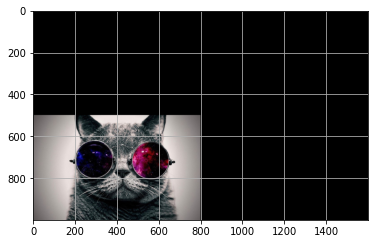

In [ ]:
plt_imshow('', image2)

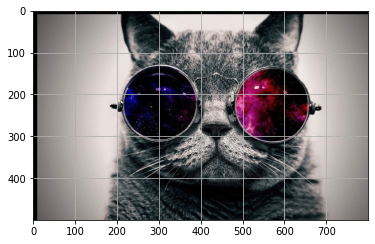

In [ ]:
temp = imutils.translate(image, 10, 10)
plt_imshow('',temp)

In [ ]:
temp.shape

(500, 800, 3)

In [ ]:
M1 = cv2.getRotationMatrix2D((0,0), 45, 1)
M2 = getRotationMatrix(-45, 0, 0)
temp = cv2.warpAffine(image2, M1, (image2.shape[1], image2.shape[0]))
temp.shape

(1000, 1600, 3)

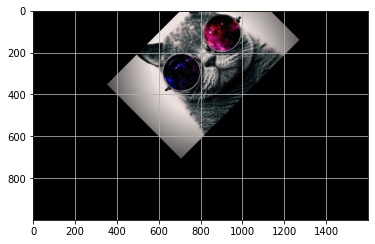

In [ ]:
plt_imshow('', temp)

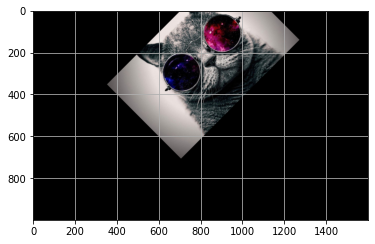

In [ ]:
plt_imshow('', cv2.warpAffine(image2, M2, (image2.shape[1], image2.shape[0]) ) )

In [ ]:
image.shape

(500, 800, 3)

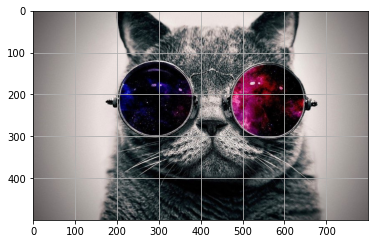

In [ ]:
plt_imshow('',image)

In [ ]:
import skimage
from skimage import transform

In [ ]:
image.shape

(500, 800, 3)

In [ ]:
image2 = np.array(image)

In [ ]:
image2.shape

(500, 800, 3)

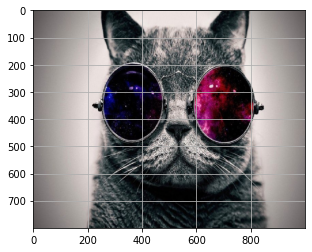

In [ ]:
temp = cv2.resize(image, (1000,800), interpolation=cv2.INTER_NEAREST)
plt_imshow('',temp)

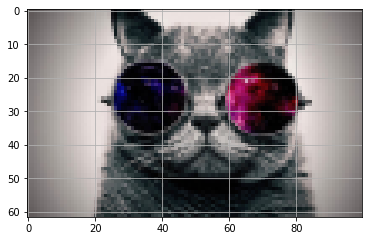

In [ ]:
temp = imutils.resize(image, width=100)
plt_imshow('',temp)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a021122-34da-482c-a2ea-1b10266af18e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>